In [1]:
#libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns
import random
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc
)


In [2]:
#save data into dataframe 
df = pd.read_csv('pulsar_stars.csv',parse_dates=True)

Exploring the data

In [3]:
#seeing the table 
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [4]:
#check if any missing data 
print(df.isna().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [5]:
#getting general info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
#how big it is
df.shape

(17898, 9)

In [7]:
#what each columns are 
col=df.columns

In [10]:
#getting a quick overview of the first 5 columns 
df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [11]:
#description of the dataframe 
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


finding out relations 

In [12]:
#get a correlations
df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


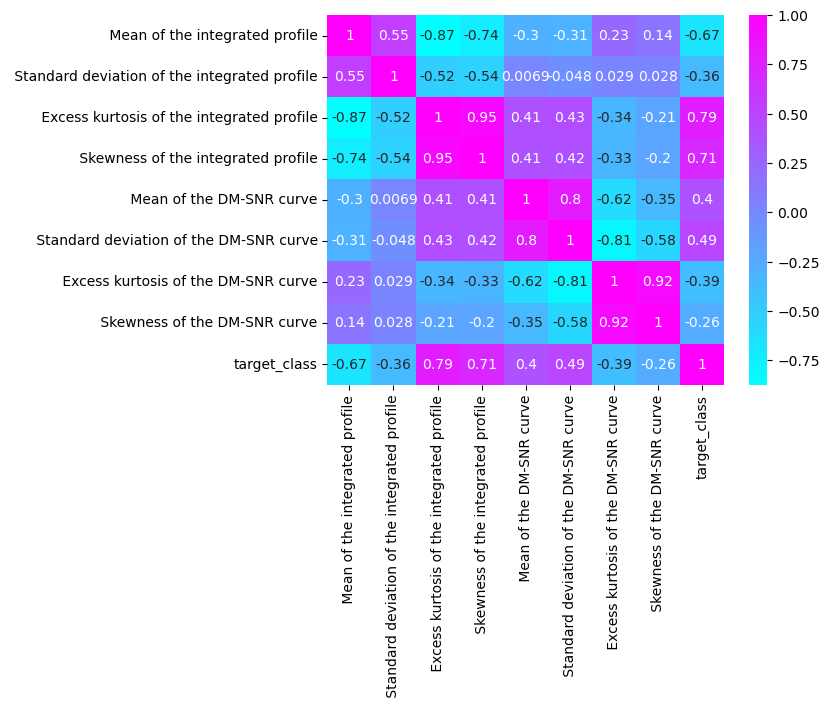

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='cool')
plt.show()

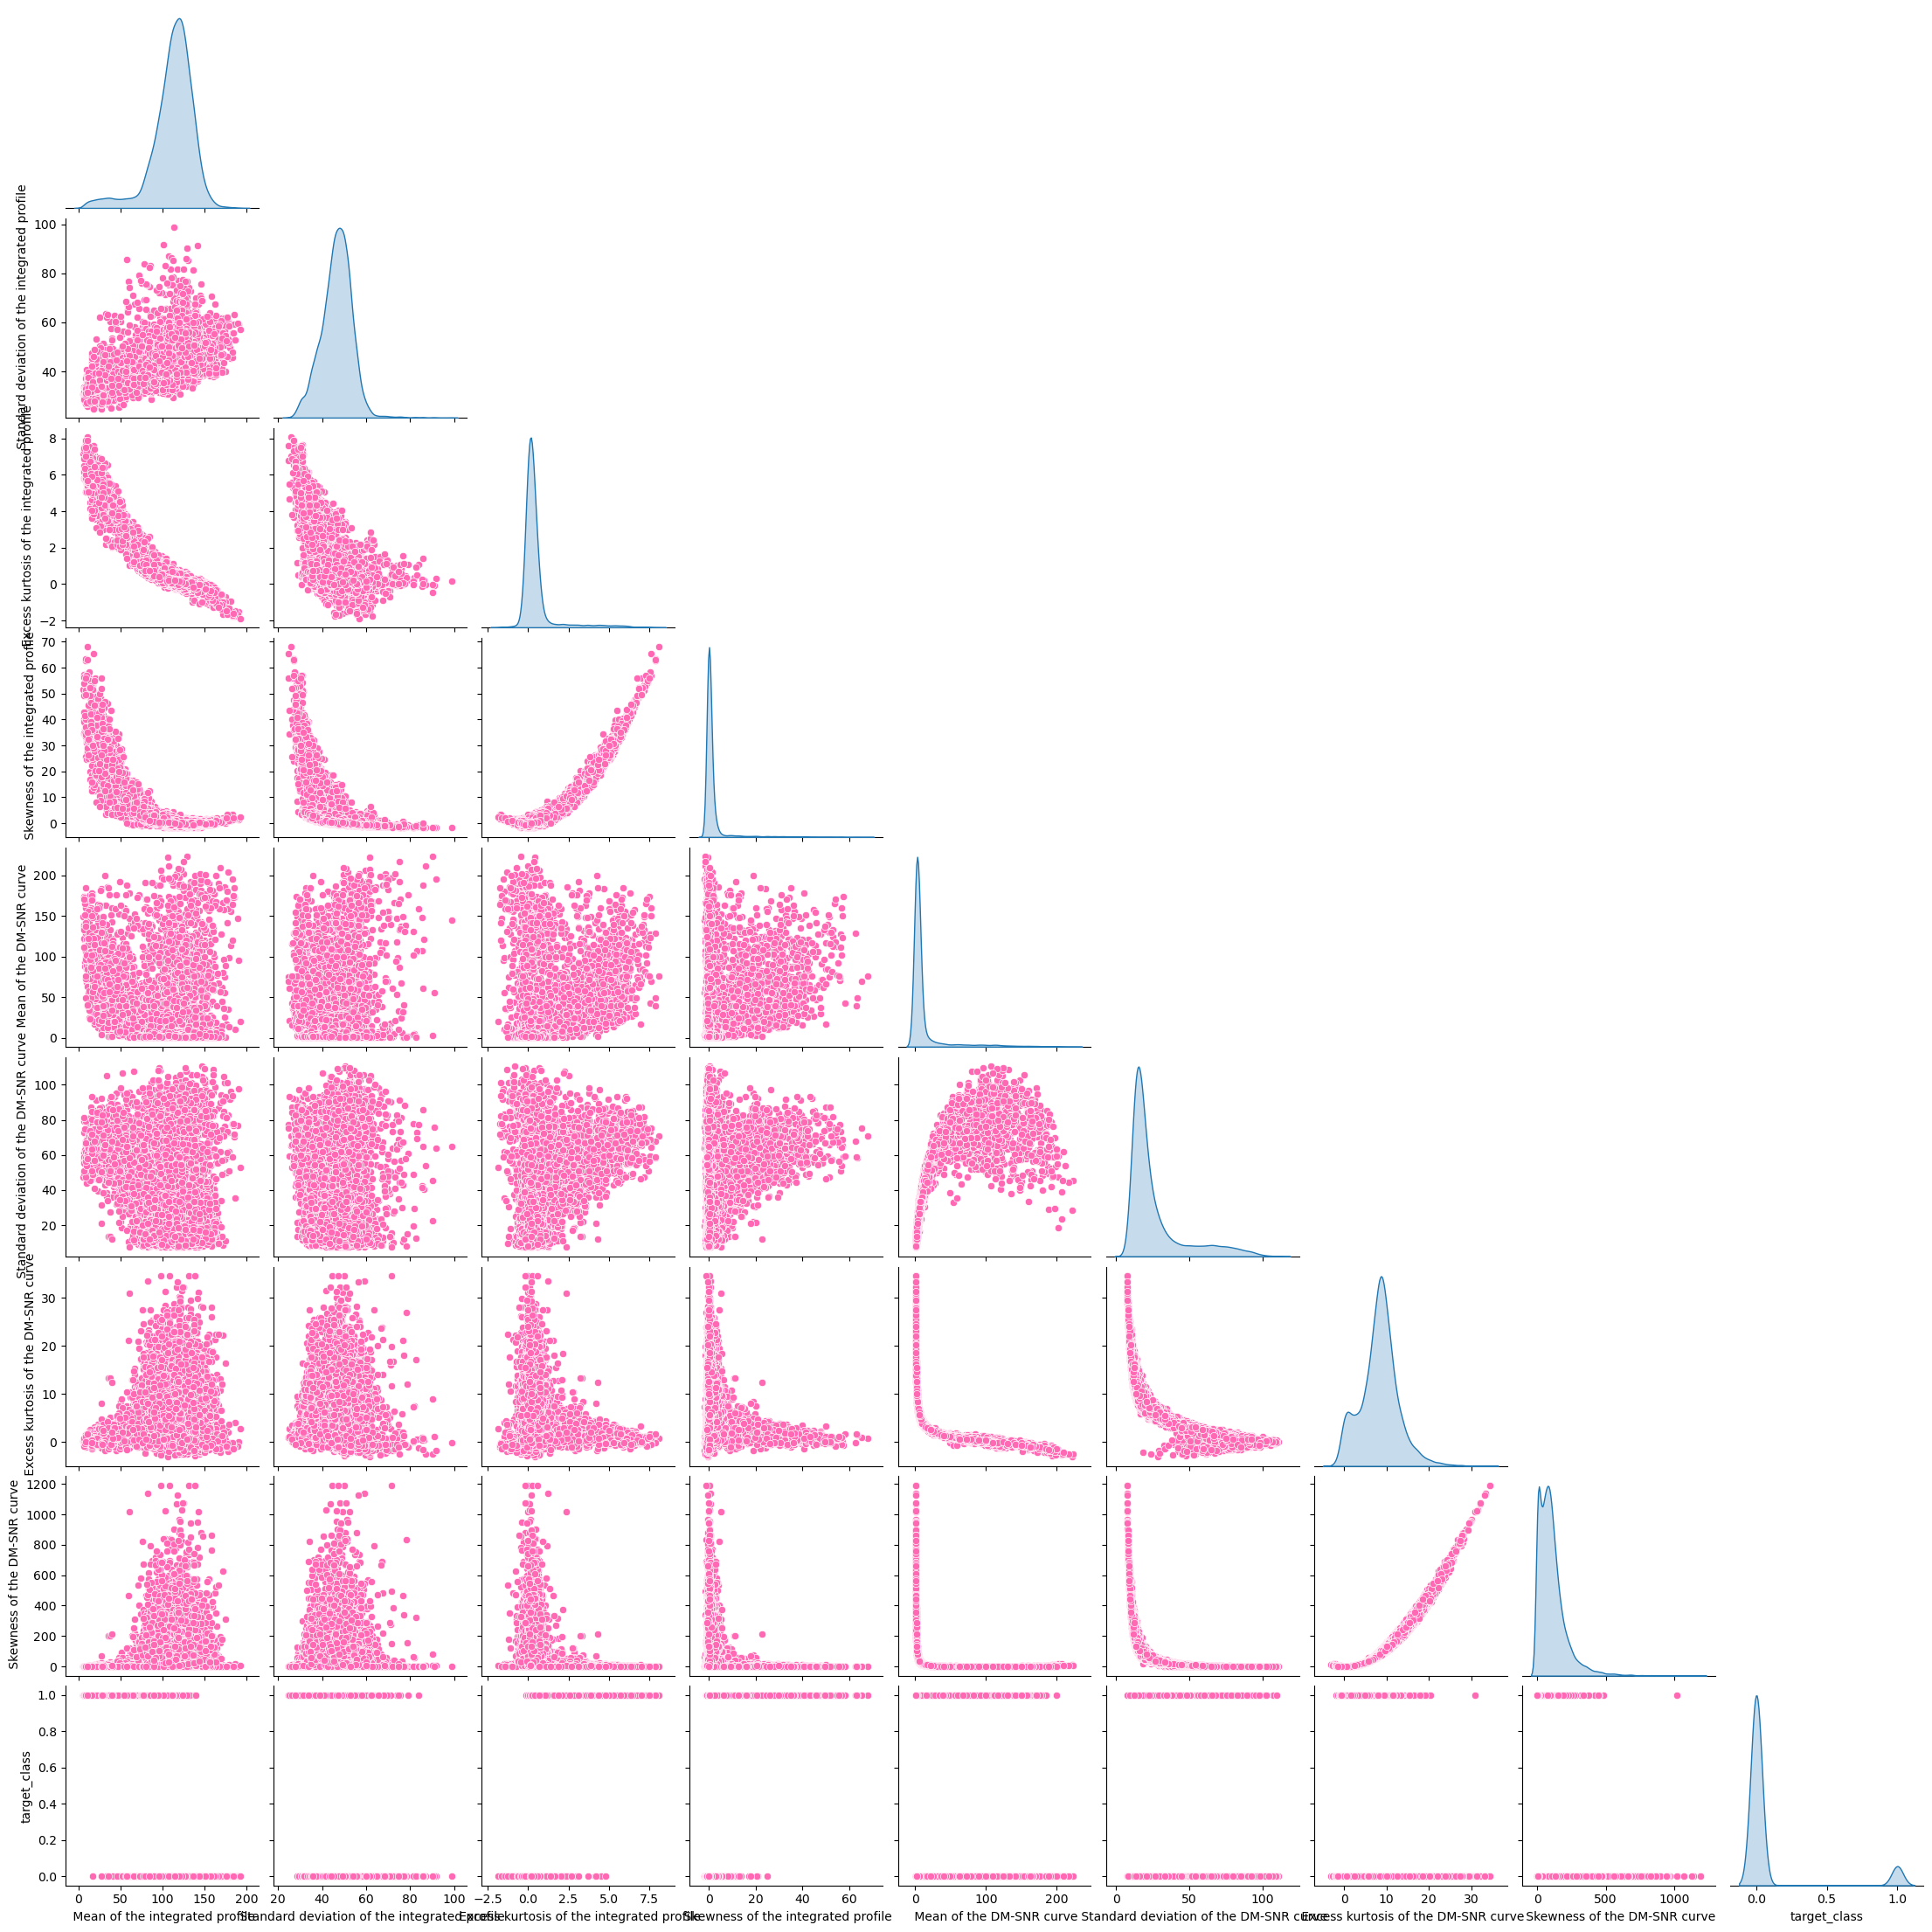

In [14]:
#creating pairplot
sns.pairplot(df, diag_kind='kde', corner=True, plot_kws={'color': 'hotpink'})
plt.show()

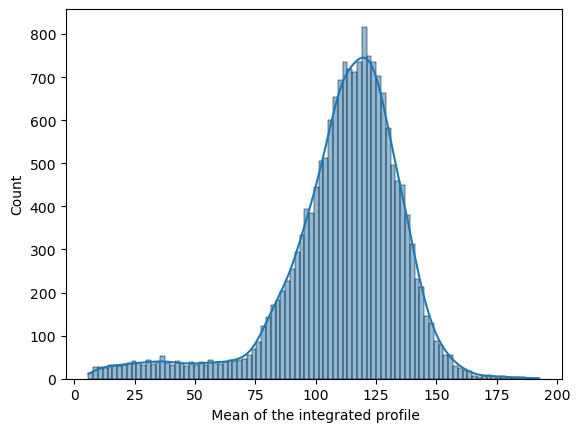

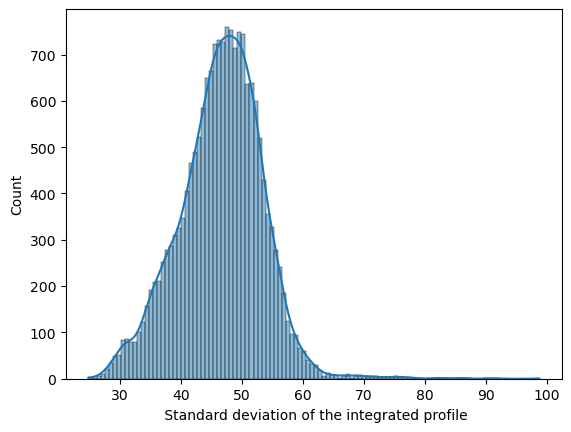

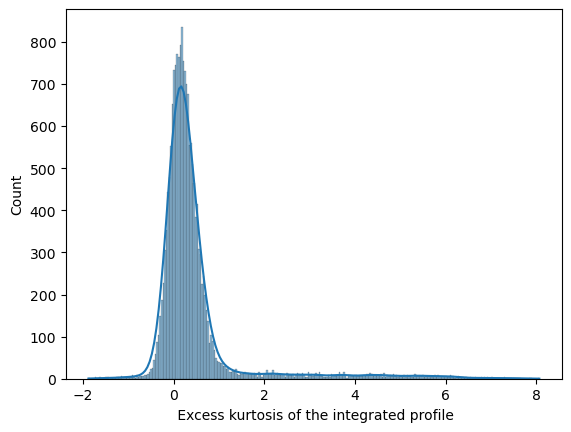

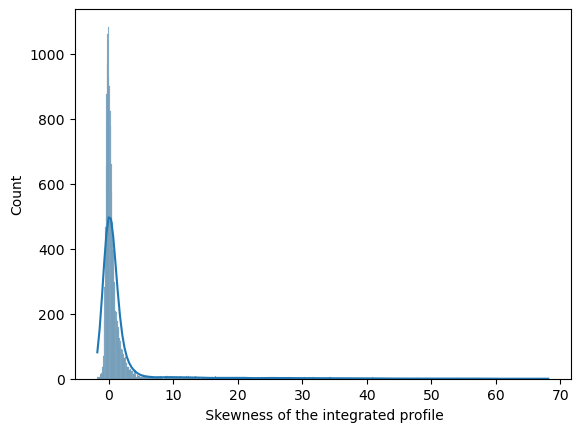

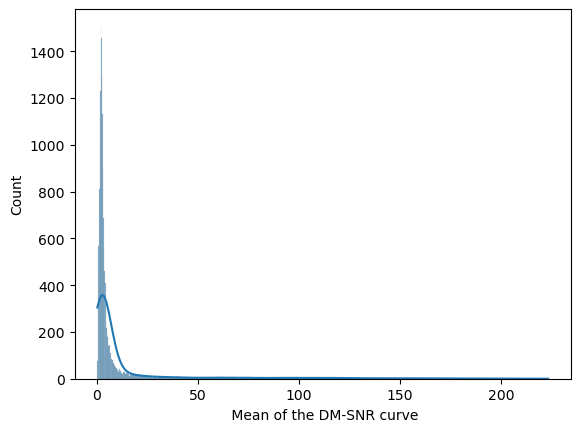

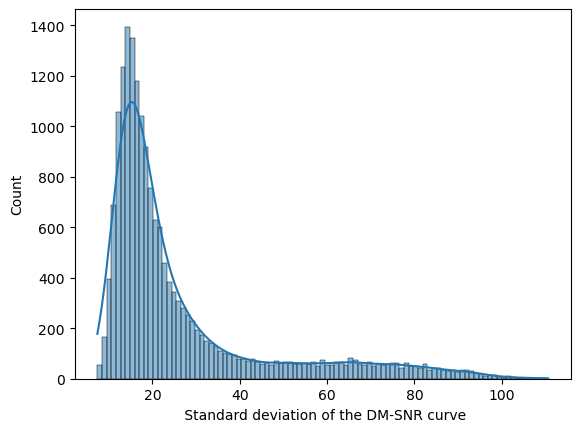

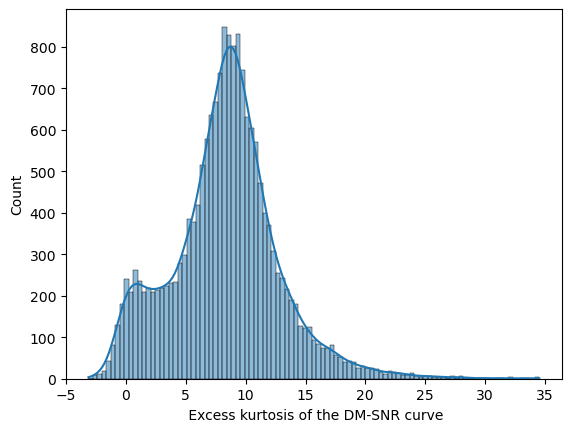

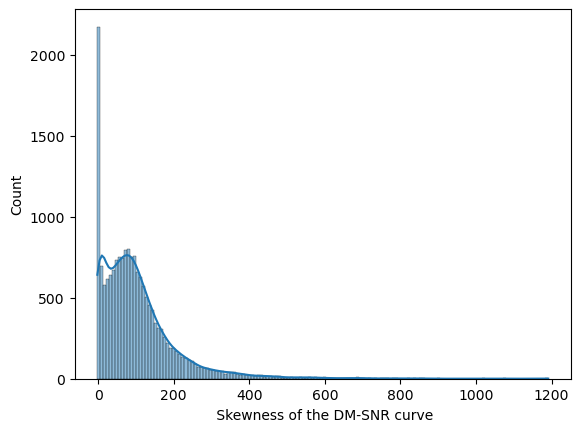

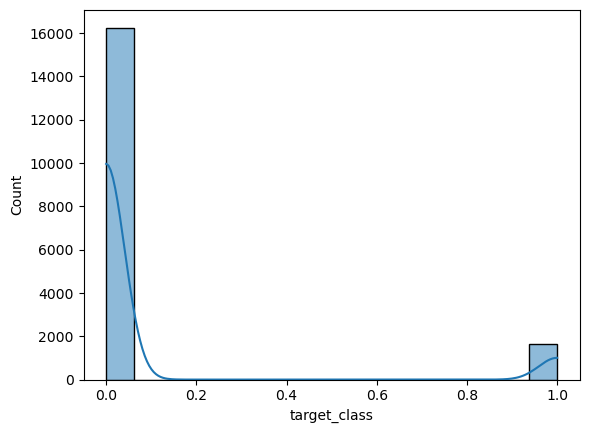

In [18]:
#histogram for each column to see how the data is spread 
col_list = df.columns.tolist()
for i in col_list:
    sns.histplot(df[i], kde=True)
    filename = f"histogram_{i}.png"
    plt.savefig(filename) 
    plt.show()

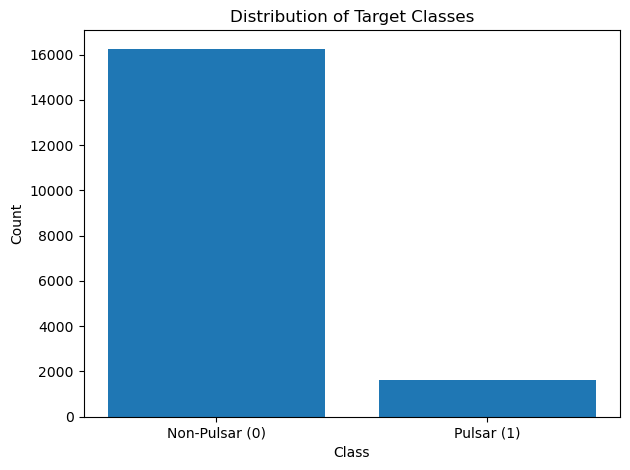

In [23]:
#plot target differentky as it's binary 
class_counts = df['target_class'].value_counts().sort_index()  # Ensures 0 comes before 1
plt.bar(class_counts.index, class_counts.values)
plt.xticks([0, 1], ['Non-Pulsar (0)', 'Pulsar (1)'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.tight_layout()
plt.savefig("class_distribution.png")
plt.show()

Classify the data 

In [24]:
# creating a data frame without target and one with just target 
df_nt = df.drop(columns=["target_class"])  
target= df["target_class"]

In [25]:
#splitting the data, 20% to test and 80% to train 
df_nt_train, df_nt_test, target_train, target_test = train_test_split(df_nt, target, test_size=0.2, random_state=42)

In [26]:
#models
#Naive Bayes
nb = GaussianNB()
nb.fit(df_nt_train, target_train)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(df_nt_train, target_train)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(df_nt_train, target_train)

LogisticRegression(max_iter=1000)


--- Naive Bayes ---
[[3116  143]
 [  45  276]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3259
           1       0.66      0.86      0.75       321

    accuracy                           0.95      3580
   macro avg       0.82      0.91      0.86      3580
weighted avg       0.96      0.95      0.95      3580

AUC: 0.9584

--- LDA ---
[[3243   16]
 [  76  245]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.76      0.84       321

    accuracy                           0.97      3580
   macro avg       0.96      0.88      0.91      3580
weighted avg       0.97      0.97      0.97      3580

AUC: 0.9735

--- Logistic Regression ---
[[3241   18]
 [  57  264]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.82      0.88       321

    accuracy  

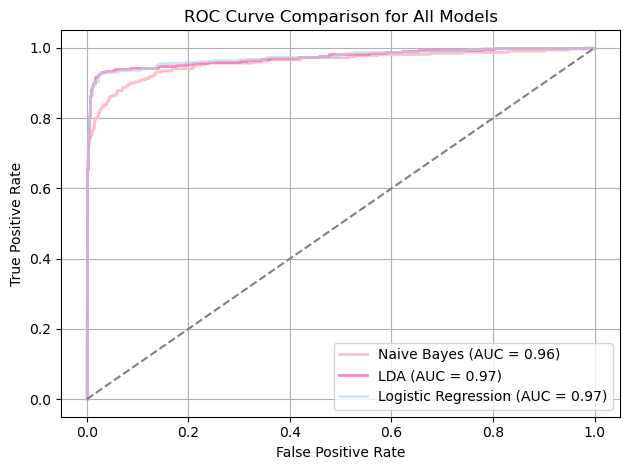

In [35]:
# Defining the models
models = {
    "Naive Bayes": nb,
    "LDA": lda,
    "Logistic Regression": lr
}

# Opacity levels since they should get fainter to be still visble
alpha = [1,0.8,0.6]
color = ['pink','hotpink','lightblue']

# to Store ROC data
roc_data = []

# Print metrics nicely
for idx, (name, model) in enumerate(models.items()):
    target_pred = model.predict(df_nt_test)
    target_proba = model.predict_proba(df_nt_test)[:, 1]

    print(f"\n--- {name} ---")
    print(confusion_matrix(target_test, target_pred))
    print(classification_report(target_test, target_pred))

    fpr, tpr, _ = roc_curve(target_test, target_proba)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")

    roc_data.append((fpr, tpr, roc_auc, name, color[idx],alpha[idx]))

#Plot of ROC curve
for fpr, tpr, roc_auc, name, color, alpha in roc_data:
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})", linewidth=2, color=color,alpha=alpha)

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('star')
plt.show()
